% ISOM 3025 Lect5
% Yi Ding
% 1 Feb 2024

# Lecture 5: Simulation-Based Markov Decision Processes


## Outlines

In this lecture:

* Overview of Markov processes
* Introducing Markov chains
* Application: Random walk



## Overview of Markov process



Markov's decision-making process is defined as a discrete-time stochastic control process.
If starting from an instant $t$ in which an observation of the system is made, **the evolution
of the process will depend only on $t$,  while it will not be influenced by the previous
instants**. Here, we can say that the stochastic process is Markovian.


### The agent-environment interface
A Markovian process takes on the characteristics of an interaction problem between two
elements in order to achieve a goal. The two characteristic elements of this interaction
are the **agent** and the **environment**. The agent is the element that must reach the goal,
while the environment is the element that the agent must interact with. The environment
corresponds to everything that is external to the agent.
The agent is a piece of software that performs the services necessary for another piece
of software in a completely automatic and intelligent way. 

The agent's behavior is characterized by attempting to achieve a specific goal. To do this, it
performs actions on an environment it does not know a priori, or at least not completely.
This uncertainty is filled through the interaction between the agent and the environment.
In this phase, the agent learns to know the states of the environment by measuring it, in
this way planning its future actions.

The strategy adopted by the agent is based on the principles of error theory: proof of the
actions and memory of the possible mistakes made in order to make repeated attempts
until the goal is achieved. These actions by the agent are repeated continuously, causing
changes in the environment that change their state.

The decision-making process can be summarized in three essential points:

* Objective of the agent

* Interaction with the enviroment

* Total or partial uncertainty of the enviroment


In this chapter, we will explore various techniques based on Monte Carlo
methods for process simulation. We will first learn the basic concepts and then we will
learn how to apply them to practical cases.




![Figure 5.1 - The agent's decision making process in GC2020](markov_agent_decision.jpg)

Figure 5.1 – The agent's decision-making process in GC2020


### Exploring MDPs

A Markov decision-making process is defined as a discrete-time
stochastic control process.


The state at time $t$ is represented by a random variable $s_t$. Decision-making is interpreted
as a discrete-time stochastic process. A discrete-time stochastic process is a sequence of
random variables $x_t$, with $t\in N$. We can define some elements as follows:

* State space: Set of values that random variables can assume
* History of a stochastic process (path): Realization of the sequence of random variables
* The response of the environment to a certain action is represented by the **reward**.



![Figure 5.2 – The agent-environment interaction in MDP of CZ2020](agent_env_interaction.jpg)


The essential steps of the agent-environment interaction, schematically represented in the
previous diagram, are listed here:

1. The interaction between the agent and the environment occurs at discrete instants over time.
2. In every instant, the agent monitors the environment by obtaining its state $s_t \in S$, where $S$ is the set of possible states.
3. The agent performs an action $a \in A(s_t)$, where $A(s_t)$ is the set of possible actions available for the state $s_t$.
4. The agent chooses one of the possible actions according to the objective to be achieved.
5. This choice is dictated by the policy $\pi (s, a)$, which represents the probability that the action a is performed in the state $s$.
6. At time $t + 1$, the agent receives a numerical reward $r_{t + 1} \in R$ corresponding to the action previously chosen.
7. Because of the choice, the environment passes into the new state.
8. The agent must monitor the state of the environment and perform a new action.
9. This iteration repeats until the goal is achieved.

In the iterative procedure we have described, the state $s_{t + 1}$ depends on the previous
state and the action taken. This feature defines the process as an MDP, which can be
represented by the following equation:
$$s_{t+1}=\delta(s_t,a).$$

In the previous equation, $\delta$ represents the state function. We can summarize an MDP
as follows:
1. The agent monitors the state of the environment and has a series of actions.
2. At a discrete time t, the agent detects the current state and decides to perform an
action $a_t\in A$.
3. The environment reacts to this action by returning a reward $r_t = r (s_t, a_t)$ and moving
to the state $s_{t + 1} = \delta(s_t, a_t)$.

### The reward function
A reward function identifies the target in a Markovian process. It maps the states of
the environment detected by the agent by enclosing them in a single number, which
represents the reward. 

### Policy
A policy determines the agent's behavior in terms of decision-making. It maps both the
states of the environment and the actions to be chosen in those states, which represent
a set of rules or associations that respond to a stimulus. If the policy provides the highest expected utility
among the possible actions, it is called an optimal policy (π*). In this way, the agent does
not have to keep their previous choices in memory. To make a decision, the agent only
needs to execute the policy associated with the current state.

### The state-value function
The state-value function provides us with the information necessary to evaluate the
quality of a state for an agent. It returns the value of the expected goal that was obtained
following the policy of each state, which is represented by the total expected reward. The
agent depends on the policy in order to choose the actions to be performed.

### Understanding the discounted cumulative reward
The goal of MDP is to learn a policy that guides an agent in choosing the actions to be
performed for each state of the environment. This policy aims to maximize the total
reward received during the entire sequence of actions performed by the agent.

The total reward that's obtained from adopting a
policy is calculated as follows:

$$𝑅_T = \sum_{i=0}^{\infty} 𝑟_{T+i}= 𝑟_T +r_{T+1}+ r_{T+2}+ ....$$
   
In the preceding equation, $R_T$ is the reward of the action that brings the environment into
the terminal state $s_T$.

An alternative technique uses the discounted cumulative reward, which tries to maximize
the following amount:

$$𝑅_T = \sum_{i=0}^{\infty} \gamma^{i}𝑟_{T+i}= 𝑟_T +\gamma r_{T+1}+\gamma^2 r_{T+2}+ ....$$
 
In the previous equation, $\gamma$ is called the discount factor and represents the importance of
future rewards. The discount factor is 0 ≤ γ ≤ 1 and has the following conditions:

* $\gamma <1$: The sequence rt converges to a finite value.
* $\gamma= 0$: The agent does not consider future rewards, thereby trying to maximize the reward only for the current state.
* $\gamma \geq 1$: The agent will favor future rewards over immediate rewards.

The value of the discount factor may vary during the learning process to take special
actions or states into account. An optimal policy may include individual actions that
return low rewards, provided that the total reward is higher.

### Comparing exploration and exploitation concepts
Upon reaching the goal, the agent looks for the most rewarded behavior. To do this, they
must link each action to the reward returned. In the case of complex environments with
many states, this approach is not feasible due to many action-reward pairs.

Decision-making requires a choice between the two available approaches:

• Exploitation: The best decision is made based on current information

• Exploration: The best decision is made by gathering more information

For example,we must choose the
best path to reach our trusted restaurant:

• Exploitation: Choose the path you already know.

• Exploration: Try a new path. 

In complex problems, converging toward an optimal strategy can be too slow. In these
cases, a solution to this problem is represented by a balance between exploration
and exploitation.


An agent who acts exclusively based on exploration will always behave randomly in each
state with a convergence to an optimal strategy that is practically impossible. On the
contrary, if an agent acts exclusively based on exploitation, they will always use the same
actions, which may not be optimal.

## Introducing Markov chains
Markov chains are discrete dynamic systems that exhibit characteristics attributable to
Markovian processes. These are finite state systems – finite Markov chains – in which the
transition from one state to another occurs on a probabilistic, rather than deterministic,
basis. The information available about a chain at the generic instant t is provided by
the probabilities that it are in any of the states, and the temporal evolution of the chain
is specified by specifying how these probabilities update by going from the instant t at
instant t + 1.

A random process characterized by a sequence of random variables $X = X_0, ..., X_n$ with
values in a set $j_0, j_1, ..., j_n$ is given. This process is Markovian if the evolution of the process
depends only on the current state, that is, the state after n steps. Using conditional
probability, we can represent this process with the following equation:
$$  P(X_n=j|X_0=i_{0},...,X_{n-1}=i_{n-1})=P(X_n=j|X_{n-1}=i_{n-1}). $$
    
If a discrete-time stochastic process X has a Markov property, it is called a Markov chain.
A Markov chain is said to be homogeneous if the following transition probabilities do not
depend on n, and only on i and j:
$$P(X_n=j|X_{n-1}=i).$$

In such hypotheses, let's assume we have the following:
$$p_{ij}=P(X_n=j|X_{n-1}=i).$$
All joint probabilities can be calculated by knowing the numbers pij and the following
initial distribution:
    $$p_{i}^0=P(X_0=i).$$
This probability represents the distribution of the process at zero time. The probabilities $p_{ij}$
are called **transition probabilities**, and $p_{ij}$ is the probability of transition from i to j in each
time phase.




### Transition matrix

The application of homogeneous Markov chains is easy by adopting the matrix
representation. Through this, the formula expressed by the previous equation becomes
much more readable. We can represent the structure of a Markov chain through the
following transition matrix:
 
 $$
    p_{11}\; p_{12}\;...\;p_{1n}\\
    p_{21}\;p_{22}\;...\; p_{2n}\\
    ...\;...\;...\;...\\
    p_{n1}\;p_{n2}\;...\;p_{nn}
    $$
    
The elements of the ith row are the probabilities that the chain, being in the state Si at the
instant t, passes through S1 or S2,. . . or Sn at the next instant. Such transitions are mutually
exclusive and exhaustive of all possibilities. Such a positive matrix with unit sum lines is
stochastic.The transition matrix has the position (i, j) to pass from result i to result j by performing a
single experiment.
    
    

## Application: Random walk

Random walks identify a class of mathematical models used to simulate a path consisting
of a series of random steps. The complexity of the model depends on the system features
we want to simulate, which are represented by the number of degrees of freedom and
the direction. The authorship of the term is attributed to Karl Pearson who, in 1905,
first referred to the term casual walk. In this model, each step has a random direction
that evolves through a random process involving known quantities that follow a precise
statistical distribution. The path that's traced over time will not necessarily be descriptive
of real motion: it will simply return the evolution of a variable over time. This is the reason
for the widespread use of this model in all areas of science: chemistry, physics, biology,
economics, computer science, and sociology.

### One-dimensional random walk



![Figure 5.4](onedim_randomwalk.jpg)
Figure 5.4 – One dimensional random walk of CZ2020


The path of the point particle can be summarized as follows: for each instant, the particle
moves one step to the right or left according to the value returned by a random variable $Z_n$. This random variable takes only two dichotomous values:
* $+1$ with probability p > 0
* $-1$ with probability q > 0

The two probabilities are related to each other through the following equation:
$$p + q = 1.$$
Let's consider random variables $Z_n$ with n = 1, 2, …. Suppose that these variables are
independent and with equal distribution. The position of the particle at instant n will be
represented by the following equation:
$$𝑋_𝑛 = 𝑋_{𝑛−1} + 𝑍_𝑛,\;𝑛 = 1,2, ...$$

### Simulating one-dimensional random walk

pseudocode:

1. Start from the 0 position.
2. Randomly select a dichotomous value (-1, 1).
3. Add this value to the previous time step.
4. Repeat step 2 onward.

In [27]:
from random import seed
from random import random
from matplotlib import pyplot

In [28]:
seed(1) 


The random.seed() function is useful if we wish to have the same set of data available to be processed in different ways as this makes the simulation reproducible.

In [29]:
RWPath= list()

In [38]:
ZNValue=-1 if random() < 0.2 else 1 # q=0.5

In [44]:
RWPath= list()
XNValue=0
for i in range(0, 1000):
    ZNValue = -1 if random() < 0.6 else 1
    XNValue = XNValue + ZNValue
    RWPath.append(XNValue)

<function matplotlib.pyplot.show(close=None, block=None)>

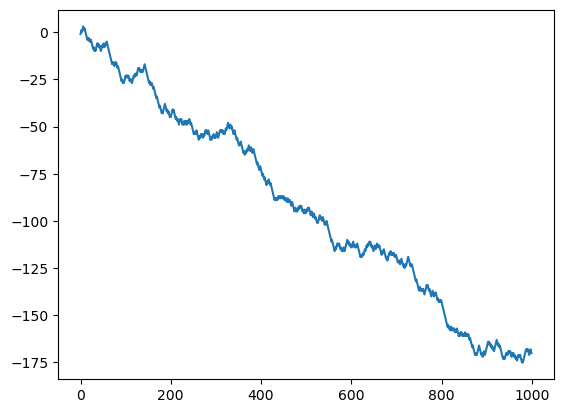

In [45]:
pyplot.plot(RWPath)
pyplot.show

Reference: GC Chapter 5


Next: Weather forecast modeling    